##LLM-Powered Blog Summarizer: Exploring Cutting-Edge Techniques##
In today's world of too much online information, it's important to quickly understand long blog posts. That's where Language Model (LLM) technologies come in. They're changing how we read and shorten big amounts of text. This project, called "LLM-Powered Blog Summarizer: Exploring Cutting-Edge Techniques," looks into these advanced models.
We start by picking out useful information from long blog posts. Using top LLMs like BART, T5, and Pegasus, we show how they can summarize blogs accurately and efficiently.
We use different LLMs, each with its own way of working, to make short summaries of long blogs. By using BART, T5, and Pegasus models, we want to see what works best and compare their results.
Behind the scenes, we check how similar the summaries are to a reference using cosine similarity. This helps us see if the summarization techniques are working well.
Come join us as we explore LLMs and see how they're changing how we summarize blogs. It's all about the latest techniques making blog reading easier.
##Task 1: Extracting Blog Content##
Our first task is to read the content of a blog. We have a file called "blog.txt" where the blog is stored. Our goal here is to open the file, read its contents, and store them in a variable so we can work with them later. Let's go ahead and do that!

In [ ]:
import re
import string
file_path = '/content/blog.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    blog_content = file.read()
#--- Read in blog.txt file ----
blog_content

"In the recent annals of history, the devastating fire that engulfed the Notre-Dame Cathedral in Paris on April 15, 2019, stands as a profound chapter, underscored by numerical significance and a poignant chronology of events.\\n\\nAt approximately 6:20 PM, a blaze erupted within the 850-year-old architectural masterpiece, shrouding the iconic cathedral in flames. The sight of billowing smoke and raging fire shook the world, sparking a frantic effort to save the beloved landmark.\\n\\nThe numerical gravity of the event was staggering - it took 15 hours and 400 firefighters battling tirelessly to extinguish the inferno. During those agonizing hours, the blaze consumed the cathedral's spire and ravaged a significant portion of its roof, devastating centuries-old artifacts and irreplaceable treasures.\\n\\nThe visceral impact was profound: millions worldwide witnessed the cathedral's iconic spire, which had stood for 162 years, dramatically collapsing into the inferno. However, amidst the

##Task 2: Cleaning Blog Text##
Great job on reading the blog content! Now, let's clean up the text to make it easier to work with. We'll convert all the text to lowercase so that we don't have to worry about capitalization. Then, we'll remove any extra spaces between paragraphs to make the text more uniform. This will help us analyze the blog more effectively. Let's clean up the text and get it ready for analysis!

In [ ]:
text = blog_content.lower()
cleaned_text = text.replace('\\n\\n', '')
cleaned_text

"in the recent annals of history, the devastating fire that engulfed the notre-dame cathedral in paris on april 15, 2019, stands as a profound chapter, underscored by numerical significance and a poignant chronology of events.at approximately 6:20 pm, a blaze erupted within the 850-year-old architectural masterpiece, shrouding the iconic cathedral in flames. the sight of billowing smoke and raging fire shook the world, sparking a frantic effort to save the beloved landmark.the numerical gravity of the event was staggering - it took 15 hours and 400 firefighters battling tirelessly to extinguish the inferno. during those agonizing hours, the blaze consumed the cathedral's spire and ravaged a significant portion of its roof, devastating centuries-old artifacts and irreplaceable treasures.the visceral impact was profound: millions worldwide witnessed the cathedral's iconic spire, which had stood for 162 years, dramatically collapsing into the inferno. however, amidst the devastation emerg

##Task 3: Summarizing Blog Content##
We will create a summary of the blog. We'll use a special tool called BART to help us with this task. First, we'll load the BART tokenizer and model. Then, we'll tokenize the cleaned text and feed it into the model to generate a summary. The summary will capture the main points of the blog in a concise form. Once generated, we'll save the summary to a file for future reference. Let's generate the summary and see what insights we can gather from the blog!

###Cosine Similarity for Text Summarization Testing:###

Cosine similarity is a way to see how much alike two sets of things are. In text summarization, it's used to check how similar a summary made by a computer is to one made by a person. It looks at the direction of the sets, not how big they are. This method works well for understanding if two texts are similar in meaning. It doesn't matter how long the texts are. Using cosine similarity helps us measure how good a summarization model is at making summaries that match the original text.

#BART

In [ ]:
pip install transformers

In [ ]:
from transformers import BartTokenizer, TFBartForConditionalGeneration

# Load the BART tokenizer and model
tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-cnn')
model = TFBartForConditionalGeneration.from_pretrained('facebook/bart-large-cnn')

# Tokenize the cleaned text
inputs = tokenizer.encode(cleaned_text, return_tensors="tf", max_length=1024, truncation=True)

# Generate the summary
summary_ids = model.generate(inputs, max_length=300, num_beams=4, early_stopping=True)

# Decode the generated summary
summary_bart = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
# Define the filename
output_filename = '/content/summary_bart.txt'

# Write the summary to the file
with open(output_filename, 'w', encoding='utf-8') as file:
    file.write(summary_bart)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBartForConditionalGeneration.

All the weights of TFBartForConditionalGeneration were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBartForConditionalGeneration for predictions without further training.


##Task 4: Alternative Blog Summarization with T5 Model##
Fantastic job on generating the blog summary using BART! Now, let's explore another approach to summarizing the blog content. We'll use a different tool called T5 to help us with this task. Similar to before, we'll load the T5 tokenizer and model. Then, we'll tokenize the cleaned text and feed it into the model to generate a summary. Once generated, we'll save the summary to a file for future reference. Let's generate the summary and see how it compares to the one we created earlier!

In [ ]:
pip install SentencePiece

In [ ]:
from transformers import T5Tokenizer, TFT5ForConditionalGeneration

# Load the pre-trained T5 tokenizer and model
tokenizer = T5Tokenizer.from_pretrained('t5-large')
model = TFT5ForConditionalGeneration.from_pretrained('t5-large')

# Combine the "summarize: " prefix with the cleaned text
input_text = "summarize: " + cleaned_text

# Tokenize and encode the input text
inputs = tokenizer.encode(input_text, return_tensors="tf", max_length=1024, truncation=True)

# Generate the summary
summary_ids = model.generate(inputs, max_length=150, num_beams=4, early_stopping=True)

# Decode the generated summary IDs
summary_t5 = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# Define the output filepath
output_filepath = '/content/summary_t5.txt'

# Write the generated summary into a text file
with open(output_filepath, 'w', encoding='utf-8') as file:
    file.write(summary_t5)

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


model.safetensors:   0%|          | 0.00/2.95G [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFT5ForConditionalGeneration.

All the weights of TFT5ForConditionalGeneration were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


##Task 5: Employing Pegasus Model for Blog Summarization##
Well done on exploring multiple approaches to summarizing the blog content! Now, let's try yet another method using Pegasus. We'll load the Pegasus tokenizer and model to help us with this task. Following a similar process as before, we'll tokenize the cleaned text and feed it into the model to generate a summary. The summary will give us a condensed version of the blog's key points. Once generated, we'll save the summary to a file for future reference. Let's generate the summary and see how it differs from the previous ones!

In [ ]:
from transformers import PegasusTokenizer, TFPegasusForConditionalGeneration

# Load the pre-trained Pegasus tokenizer and model
tokenizer = PegasusTokenizer.from_pretrained('google/pegasus-large')
model = TFPegasusForConditionalGeneration.from_pretrained('google/pegasus-large')

# Assuming 'cleaned_text' is available and contains the text to summarize
# Tokenize the input text
inputs = tokenizer(cleaned_text, max_length=1024, return_tensors='tf', truncation=True)

# Generate the summary
summary_ids = model.generate(inputs['input_ids'], max_length=150, num_beams=4, length_penalty=2.0, early_stopping=True)

# Decode the generated summary IDs
summary_pegasus = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# Define the output filepath
output_filepath = '/content/summary_pegasus.txt'

# Write the generated summary into a text file
with open(output_filepath, 'w', encoding='utf-8') as file:
    file.write(summary_pegasus)

# Returning the path where the summary is saved, in case it needs to be retrieved
output_filepath

tokenizer_config.json:   0%|          | 0.00/88.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/3.09k [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFPegasusForConditionalGeneration.

Some layers of TFPegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-large and are newly initialized: ['final_logits_bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/260 [00:00<?, ?B/s]

'/content/summary_pegasus.txt'

##Evaluation

In [ ]:
pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=e544947afd6d22bc5f3b24d8b93bb29f6871472182446179df972341ce641040
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


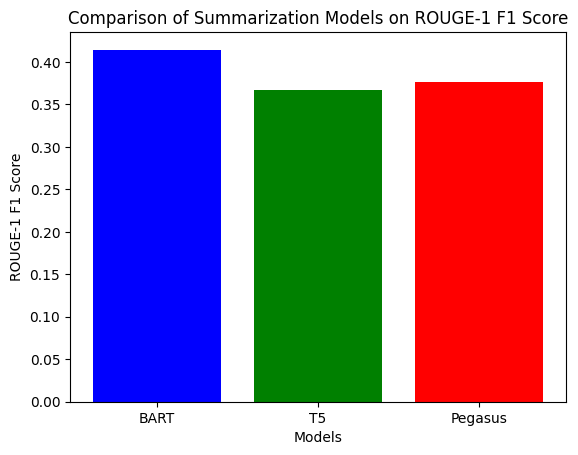

In [ ]:
from rouge_score import rouge_scorer
import matplotlib.pyplot as plt
import numpy as np

# Function to read the summaries from file
def read_summary(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

# Read the generated summaries
summary_bart = read_summary('/content/summary_bart.txt')
summary_t5 = read_summary('/content/summary_t5.txt')
summary_pegasus = read_summary('/content/summary_pegasus.txt')

# Placeholder for reference summaries
reference_summaries = ["The tragic fire at Notre-Dame on April 15, 2019, deeply affected the global community, highlighting both the vulnerability and resilience of cultural heritage. The disaster required 400 firefighters and 15 hours to control, destroying the spire and parts of the roof. Despite this, over €800 million was quickly raised for restoration. By the 5th anniversary, Notre-Dame reopened, demonstrating progress and the enduring human spirit in the face of adversity, with a blend of traditional and modern restoration techniques."]

# Initialize the ROUGE scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Compute ROUGE scores
scores_bart = [scorer.score(ref_summary, summary_bart) for ref_summary in reference_summaries]
scores_t5 = [scorer.score(ref_summary, summary_t5) for ref_summary in reference_summaries]
scores_pegasus = [scorer.score(ref_summary, summary_pegasus) for ref_summary in reference_summaries]

# Extract ROUGE-1 F1 scores for visualization
rouge1_f1_bart = np.mean([score['rouge1'].fmeasure for score in scores_bart])
rouge1_f1_t5 = np.mean([score['rouge1'].fmeasure for score in scores_t5])
rouge1_f1_pegasus = np.mean([score['rouge1'].fmeasure for score in scores_pegasus])

# Create a bar chart for ROUGE-1 F1 scores
labels = ['BART', 'T5', 'Pegasus']
rouge1_f1_scores = [rouge1_f1_bart, rouge1_f1_t5, rouge1_f1_pegasus]

plt.bar(labels, rouge1_f1_scores, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('ROUGE-1 F1 Score')
plt.title('Comparison of Summarization Models on ROUGE-1 F1 Score')
plt.show()
